In [2]:
import math
import numpy as np
import cv2
from matplotlib import pyplot as plt    
from PIL import Image, ImageFilter
from PIL import Image
from PIL import Image
%matplotlib inline
im1=cv2.imread('E:/datasets/20/252.png')
cv2.imshow("Input Image", im1)
im2= cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
cv2.imshow("GrayScale" ,im2)
cv2.waitKey()


-1

In [3]:
resized = cv2.resize(im2, (2000, 1500))
print(f"Resized Dimensions : {resized.shape}")
cv2.imwrite('resized_imaged.jpg', resized)
cv2.imshow("GrayScale Image", resized)
cv2.waitKey()

Resized Dimensions : (1500, 2000)


-1

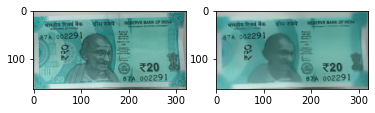

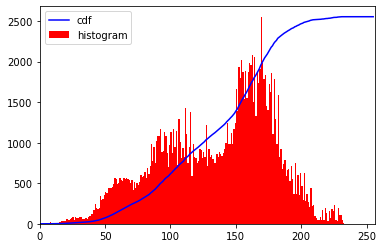

The PSNR value of Speckle noise is  27.76271263863258


In [4]:
image = cv2.cvtColor(im1 , cv2.COLOR_BGR2GRAY)
dst = cv2.fastNlMeansDenoisingColored(im1,None,10,10,7,21)
plt.subplot(121),plt.imshow(im1)
plt.subplot(122),plt.imshow(dst)
plt.show()

hist,bins = np.histogram(dst.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(dst.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

def calculate_psnr(im1,dst):
    im1 = im1.astype(np.float64)
    dst= dst.astype(np.float64)
    mse = np.mean((im1 - dst)**2)
    if mse == 0:
        return float('inf')
    return 20 * math.log10(255.0 / math.sqrt(mse))
d=calculate_psnr(im1,dst)
print("The PSNR value of Speckle noise is ",d)

In [ ]:
image = cv2.cvtColor(im1 , cv2.COLOR_BGR2GRAY) 
gauss = np.random.normal(0,1,im1.size)
gauss = gauss.reshape(im1.shape[0],im1.shape[1],im1.shape[2]).astype('uint8')
noise = im1 + im1 * gauss
cv2.imshow('a',noise)
cv2.waitKey(0)

hist,bins = np.histogram(noise.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(noise.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

def calculate_psnr(im1, noise):
    im1 = im1.astype(np.float64)
    noise= noise.astype(np.float64)
    mse = np.mean((im1 - noise)**2)
    if mse == 0:
        return float('inf')
    return 20 * math.log10(255.0 / math.sqrt(mse))
d=calculate_psnr(im1,noise)
print("The PSNR value of poisson Noise is:",d)

In [ ]:
image = cv2.cvtColor(im1 , cv2.COLOR_BGR2GRAY)
gauss = np.random.normal(0,1,im1.size)
gauss = gauss.reshape(im1.shape[0],im1.shape[1],im1.shape[2]).astype('uint8')
img_gauss = cv2.add(im1,gauss)
cv2.imshow('a',img_gauss)
cv2.waitKey(0)

hist,bins = np.histogram(img_gauss.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img_gauss.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

def calculate_psnr(im1, img_gauss):
    im1 = im1.astype(np.float64)
    img_gauss= img_gauss.astype(np.float64)
    mse = np.mean((im1 - gauss)**2)
    if mse == 0:
        return float('inf')
    return 20 * math.log10(255.0 / math.sqrt(mse))
d=calculate_psnr(im1,img_gauss)
print(" PSNR value of Gaussian Noise is:",d)

In [ ]:
image = cv2.cvtColor(im1 , cv2.COLOR_BGR2HSV) 
figure_size = 9 # the dimension of the x and y axis of the kernal.
new_image = cv2.blur(image,(figure_size, figure_size))

plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)),plt.title('Mean filter')
plt.xticks([]), plt.yticks([])
plt.show()

hist,bins = np.histogram(new_image.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(new_image.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

def calculate_psnr(image, new_image):
    image = image.astype(np.float64)
    new_image= new_image.astype(np.float64)
    mse = np.mean((image - new_image)**2)
    if mse == 0:
        return float('inf')
    return 20 * math.log10(255.0 / math.sqrt(mse))
d=calculate_psnr(image,new_image)
print(" PSNR value of Mean Filter is:",d)

In [ ]:
new_image = cv2.GaussianBlur(im1, (figure_size, figure_size),0)
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)),plt.title('Gaussian Filter')
plt.xticks([]), plt.yticks([])
plt.show()

hist,bins = np.histogram(new_image.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(new_image.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

def calculate_psnr(image,new_image ):
    image = image.astype(np.float64)
    new_image= new_image.astype(np.float64)
    mse = np.mean((image - new_image)**2)
    if mse == 0:
        return float('inf')
    return 20 * math.log10(255.0 / math.sqrt(mse))
d=calculate_psnr(image,new_image)
print(" PSNR value of Gaussian Filter is:",d)

In [ ]:
new_image = cv2.medianBlur(im1, figure_size)
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)),plt.title('Median Filter')
plt.xticks([]), plt.yticks([])
plt.show()

hist,bins = np.histogram(new_image.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(new_image.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

def calculate_psnr(image, new_image):
    image = image.astype(np.float64)
    new_image= new_image.astype(np.float64)
    mse = np.mean((image- new_image)**2)
    if mse == 0:
        return float('inf')
    return 20 * math.log10(255.0 / math.sqrt(mse))
d=calculate_psnr(image,new_image)
print(" PSNR value of Median Filter is:",d)

In [ ]:
t_lower = 50 
t_upper = 150 
edge = cv2.Canny(im1, t_lower, t_upper)

hist,bins = np.histogram(edge.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(edge.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

def calculate_psnr(im1,edge):
    im1= im1.astype(np.float64)
    edge= edge.astype(np.float64)
    mse = np.mean((im1-edge)**2)
    if mse == 0:
        return float('inf')
    return 20 * math.log10(255.0 / math.sqrt(mse))
d=calculate_psnr(im1,gauss)
print(" PSNR value of canny edge is:",d)
cv2.imshow('Original', im1)
cv2.imshow('edge', edge)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
laplacian = cv2.Laplacian(im1, cv2.CV_64F)
plt.subplot(2,2,1),plt.imshow(im1,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.show()

hist,bins = np.histogram(laplacian.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(laplacian.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

def calculate_psnr(im1, laplacian):
    im1 = im1.astype(np.float64)
    laplacian= laplacian.astype(np.float64)
    mse = np.mean((im1 - laplacian)**2)
    if mse == 0:
        return float('inf')
    return 20 * math.log10(255.0 / math.sqrt(mse))
d=calculate_psnr(im1,laplacian)
print(" PSNR value of laplacian is:",d)

In [ ]:
sobelx = cv2.Sobel(im1,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(im1,cv2.CV_64F,0,1,ksize=5)
plt.subplot(2,2,1),plt.imshow(im1,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

hist,bins = np.histogram(sobelx.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(sobelx.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

def calculate_psnr(im1, sobelx):
    im1 = im1.astype(np.float64)
    sobelx= sobelx.astype(np.float64)
    mse = np.mean((im1 - sobelx)**2)
    if mse == 0:
        return float('inf')
    return 20 * math.log10(255.0 / math.sqrt(mse))
d=calculate_psnr(im1,sobelx)
print(" PSNR value of sobelx is:",d)

hist,bins = np.histogram(sobely.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(sobely.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

def calculate_psnr(im1, sobely):
    im1 = im1.astype(np.float64)
    sobely= sobely.astype(np.float64)
    mse = np.mean((im1 - sobely)**2)
    if mse == 0:
        return float('inf')
    return 20 * math.log10(255.0 / math.sqrt(mse))
d=calculate_psnr(im1,sobely)
print(" PSNR value of sobely is:",d)